In [ ]:
TEAM ID: PNT2022TMID06256

In [ ]:
import numpy

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from keras.optimizers import Adam

In [ ]:
from keras.utils import np_utils

# load data

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


# understanding the data

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
import matplotlib.pyplot as plt

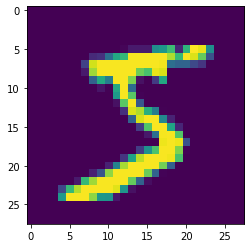

In [ ]:
plt.imshow(x_train[0])

# Reshaping Dataset

In [ ]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')

In [ ]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying One Hot Encoding

In [ ]:
number_of_classes = 10

In [ ]:
y_train = np_utils.to_categorical(y_train, number_of_classes)

In [ ]:
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# create the model

In [ ]:
model=Sequential()


In [ ]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(number_of_classes,activation="softmax"))

# Compiling the model


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

# Train The Model(fitting the model)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 169s 89ms/step - loss: 0.2433 - accuracy: 0.9507 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0711 - accuracy: 0.9784 - val_loss: 0.0694 - val_accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0947 - val_accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0946 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0907 - val_accuracy: 0.9793


# Observing the metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)

In [ ]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.0906854122877121, 0.9793000221252441]


# Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 133ms/step
[[3.3291047e-11 5.7662695e-15 9.4223129e-10 9.0904834e-10 1.5614370e-14
  8.8905153e-13 1.0450645e-15 9.9999976e-01 3.6469122e-10 2.7200767e-07]
 [4.0964514e-13 6.3254765e-15 1.0000000e+00 1.5642488e-17 2.1001445e-19
  1.5238073e-21 4.4754817e-10 9.3430676e-22 1.8966027e-15 1.5074684e-21]
 [2.9496479e-12 9.9999821e-01 1.6431573e-09 2.8690266e-14 1.7912749e-06
  1.7587244e-11 2.3807356e-10 1.7028683e-12 4.6236440e-08 6.8714942e-15]
 [1.0000000e+00 8.3795583e-19 5.1277899e-10 3.2976219e-14 8.3830283e-15
  9.0507532e-12 1.7599081e-08 8.9054182e-13 1.1442398e-12 6.0930827e-14]]


# Observing the metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.0906854122877121, 0.9793000221252441]


# Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[3.3291047e-11 5.7662695e-15 9.4223129e-10 9.0904834e-10 1.5614370e-14
  8.8905153e-13 1.0450645e-15 9.9999976e-01 3.6469122e-10 2.7200767e-07]
 [4.0964514e-13 6.3254765e-15 1.0000000e+00 1.5642488e-17 2.1001445e-19
  1.5238073e-21 4.4754817e-10 9.3430676e-22 1.8966027e-15 1.5074684e-21]
 [2.9496479e-12 9.9999821e-01 1.6431573e-09 2.8690266e-14 1.7912749e-06
  1.7587244e-11 2.3807356e-10 1.7028683e-12 4.6236440e-08 6.8714942e-15]
 [1.0000000e+00 8.3795583e-19 5.1277899e-10 3.2976219e-14 8.3830283e-15
  9.0507532e-12 1.7599081e-08 8.9054182e-13 1.1442398e-12 6.0930827e-14]]
